<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/HR_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDISI BELAJAR MENGANALISA DATA HR UNTUK MEMPEREKDIKSI "PERFORMACE SCORE", "ENGAGEMENT SURVEY" DAN "EMPOYEE SATISFACTION"

In [ ]:
#Ini Kita install dulu library yg akan dipakai sbb:

In [2]:
import pandas as pd # Ini librabry untuk semacam manipulasi data
import numpy as np # Ini library untuk operasi aritmatika
import matplotlib.pyplot as plt # Ini library untuk visualisasi
import seaborn as sns # Ini library untuk visualisasi

In [ ]:
# Kita load dan baca dataset. Kita namakan datasetnya "df_hr"

In [4]:
df_hr=pd.read_csv('/content/HRDataset_v14.csv') # Load dataset dan ganti nama dataset
df_hr.head(5) # Tampilkan isi dataset

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


**DATA PRE-PROSES.**
Kita membersihkan missing value/data dan merapikan data

In [5]:
# Kita tampilkan kolom dataset, jumlah data (baris) dan type datanya

In [6]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [ ]:
# Berdasarkan tabel di atas ada 36 kolom dan 311 baris data.Data kolom "DateOfTermination"
jumlahnya 104 (kurang dari 311) dan kolom "ManagerID" jumlahnya 303 (kurang dari 311)

In [ ]:
# Kita cek jumlah data yang NULL dan NA

In [7]:
df_hr.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
df_hr.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
# Berdasarkan data di atas kolom "DateofTermination" ada 207 yg NULL/NA dan pada kolom "ManagerID" ada 8.

In [ ]:
# Kita drop saja kolom "DateofTermination" karena lebih dari 50% data tidak ada.

In [8]:
df_hr.drop('DateofTermination', axis=1,inplace=True)

In [ ]:
# Untuk 8 data NULL/NA pada kolom "ManagerID" sy lebih pilih dihapus/drop saja dari pada di replace dengan Mean/Median

In [9]:
df_hr.dropna(subset=["ManagerID"], axis=0,inplace=True)

In [ ]:
# Untuk data kolom 'Employee_Name' , saya pilih dihapus/drop saja karena tidak meaningfull

In [10]:
df_hr.drop('Employee_Name', axis=1, inplace=True)

In [ ]:
# Kita cek hasil dari pembersihan dan perampingan data

In [11]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       303 non-null    int64  
 1   MarriedID                   303 non-null    int64  
 2   MaritalStatusID             303 non-null    int64  
 3   GenderID                    303 non-null    int64  
 4   EmpStatusID                 303 non-null    int64  
 5   DeptID                      303 non-null    int64  
 6   PerfScoreID                 303 non-null    int64  
 7   FromDiversityJobFairID      303 non-null    int64  
 8   Salary                      303 non-null    int64  
 9   Termd                       303 non-null    int64  
 10  PositionID                  303 non-null    int64  
 11  Position                    303 non-null    object 
 12  State                       303 non-null    object 
 13  Zip                         303 non

In [ ]:
# Dari table di atas, Jumlah baris data 303 (311-8) dan jumlah kolom 34 (36-2, Kolom DateOfTermination dan EMployee Name)

Kita kelompokan data ke dalam 2 jenis yaitu type numeric dan catagory

In [12]:
cats=['Position','State','DOB','Sex','CitizenDesc','HispanicLatino','DateofHire','TermReason',
      'Department','ManagerName','RecruitmentSource','PerformanceScore','LastPerformanceReview_Date','MaritalDesc','RaceDesc','EmploymentStatus']

In [13]:
nums=['EmpID','MarriedID','MaritalStatusID','GenderID','EmpStatusID','DeptID','PerfScoreID','FromDiversityJobFairID','Salary',
      'Termd','PositionID','Zip','ManagerID','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','DaysLateLast30','Absences']

Kita bisa mengetahui profile tiap data kategori seperti di bawah. Count menginformasikan jumlah data tiap variable/feature. Unique menginformasikan jumlah komponen tiap feature. Top menginformasikan komponen data yang paling banyak.Freq menginformasikan frequensi komponen yang paling banyak.

In [14]:
df_hr[cats].describe()

,Position,State,DOB,Sex,CitizenDesc,HispanicLatino,DateofHire,TermReason,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date,MaritalDesc,RaceDesc,EmploymentStatus
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,32,28,299,2,3,4,99,18,6,21,9,4,137,5,6,3
top,Production Technician I,MA,07/07/84,F,US Citizen,No,1/10/2011,N/A-StillEmployed,Production,Michael Albert,Indeed,Fully Meets,1/14/2019,Single,White,Active
freq,133,268,2,171,287,274,14,199,201,22,86,236,17,132,183,199


In [15]:
df_hr[nums].describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,10156.409241,0.402640,0.815182,0.435644,2.409241,4.600660,2.973597,0.095710,69292.316832,0.343234,16.775578,6673.544554,14.570957,4.106139,3.887789,1.250825,0.425743,10.267327
std,90.123632,0.491241,0.941413,0.496661,1.809883,1.095868,0.591856,0.294679,25406.092767,0.475574,6.289574,17114.860678,8.078306,0.794589,0.910179,2.371839,1.309769,5.883906
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1040.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10079.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55633.000000,0.000000,18.000000,1901.500000,10.000000,3.675000,3.000000,0.000000,0.000000,5.000000
50%,10157.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62910.000000,0.000000,19.000000,2130.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10234.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72331.000000,1.000000,20.000000,2359.500000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


Kita rubah data type object ke category

In [16]:
df_hr[cats]=df_hr[cats].astype('category')

In [17]:
df_hr[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Position                    303 non-null    category
 1   State                       303 non-null    category
 2   DOB                         303 non-null    category
 3   Sex                         303 non-null    category
 4   CitizenDesc                 303 non-null    category
 5   HispanicLatino              303 non-null    category
 6   DateofHire                  303 non-null    category
 7   TermReason                  303 non-null    category
 8   Department                  303 non-null    category
 9   ManagerName                 303 non-null    category
 10  RecruitmentSource           303 non-null    category
 11  PerformanceScore            303 non-null    category
 12  LastPerformanceReview_Date  303 non-null    category
 13  MaritalDesc         

In [18]:
df_hr[cats].head(5)

,Position,State,DOB,Sex,CitizenDesc,HispanicLatino,DateofHire,TermReason,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date,MaritalDesc,RaceDesc,EmploymentStatus
0,Production Technician I,MA,07/10/83,M,US Citizen,No,7/5/2011,N/A-StillEmployed,Production,Michael Albert,LinkedIn,Exceeds,1/17/2019,Single,White,Active
1,Sr. DBA,MA,05/05/75,M,US Citizen,No,3/30/2015,career change,IT/IS,Simon Roup,Indeed,Fully Meets,2/24/2016,Married,White,Voluntarily Terminated
2,Production Technician II,MA,09/19/88,F,US Citizen,No,7/5/2011,hours,Production,Kissy Sullivan,LinkedIn,Fully Meets,5/15/2012,Married,White,Voluntarily Terminated
3,Production Technician I,MA,09/27/88,F,US Citizen,No,1/7/2008,N/A-StillEmployed,Production,Elijiah Gray,Indeed,Fully Meets,1/3/2019,Married,White,Active
4,Production Technician I,MA,09/08/89,F,US Citizen,No,7/11/2011,return to school,Production,Webster Butler,Google Search,Fully Meets,2/1/2016,Divorced,White,Voluntarily Terminated


In [19]:
df_hr[nums].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 310
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmpID                   303 non-null    int64  
 1   MarriedID               303 non-null    int64  
 2   MaritalStatusID         303 non-null    int64  
 3   GenderID                303 non-null    int64  
 4   EmpStatusID             303 non-null    int64  
 5   DeptID                  303 non-null    int64  
 6   PerfScoreID             303 non-null    int64  
 7   FromDiversityJobFairID  303 non-null    int64  
 8   Salary                  303 non-null    int64  
 9   Termd                   303 non-null    int64  
 10  PositionID              303 non-null    int64  
 11  Zip                     303 non-null    int64  
 12  ManagerID               303 non-null    float64
 13  EngagementSurvey        303 non-null    float64
 14  EmpSatisfaction         303 non-null    in

In [20]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   EmpID                       303 non-null    int64   
 1   MarriedID                   303 non-null    int64   
 2   MaritalStatusID             303 non-null    int64   
 3   GenderID                    303 non-null    int64   
 4   EmpStatusID                 303 non-null    int64   
 5   DeptID                      303 non-null    int64   
 6   PerfScoreID                 303 non-null    int64   
 7   FromDiversityJobFairID      303 non-null    int64   
 8   Salary                      303 non-null    int64   
 9   Termd                       303 non-null    int64   
 10  PositionID                  303 non-null    int64   
 11  Position                    303 non-null    category
 12  State                       303 non-null    category
 13  Zip                 

Sekarang agar data bisa diolah lebih lanjut maka ubah dulu semua data kategori ke dalam data numerik. Metode perubahan type data disesuaikan dengan karakter data

In [21]:
df_hr[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Position                    303 non-null    category
 1   State                       303 non-null    category
 2   DOB                         303 non-null    category
 3   Sex                         303 non-null    category
 4   CitizenDesc                 303 non-null    category
 5   HispanicLatino              303 non-null    category
 6   DateofHire                  303 non-null    category
 7   TermReason                  303 non-null    category
 8   Department                  303 non-null    category
 9   ManagerName                 303 non-null    category
 10  RecruitmentSource           303 non-null    category
 11  PerformanceScore            303 non-null    category
 12  LastPerformanceReview_Date  303 non-null    category
 13  MaritalDesc         

Saya coba analisa tiap feature dikelompok data numerik

<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-22-fdad5a1e9a97>:6: UserWarning: Tight layout not applied. tight_layout cannot make a

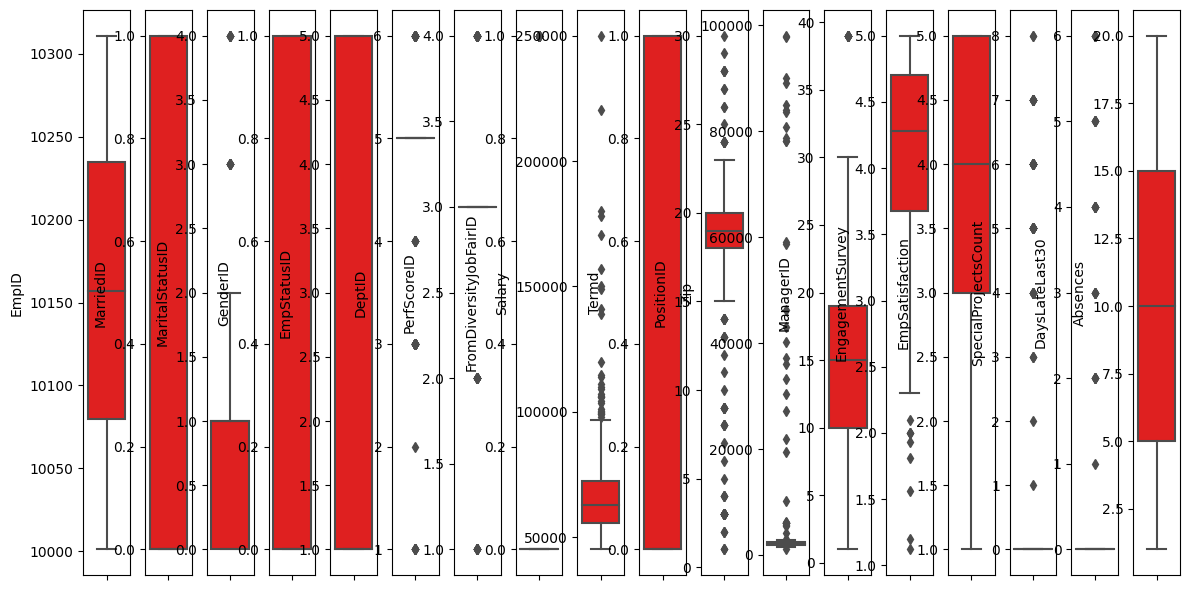

In [22]:
plt.figure(figsize=(12,6))
feature = nums
for i in range (0, len(feature)):
  plt.subplot(1,len(feature), i +1 )
  sns.boxplot(y=df_hr[feature[i]], color="red")
  plt.tight_layout()

Wah terlihat ada outlier di beberapa feature seperti Termd, Zip, EngagementSurvey dan EmpSatisfaction. Ok sy cek lagi dengan tampilan grafik

<ipython-input-23-3d47fa2724d2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_hr[feature[i]], color="red")
<ipython-input-23-3d47fa2724d2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_hr[feature[i]], color="red")
<ipython-input-23-3d47fa2724d2>:5: UserWarning: 

`distplot` is a 

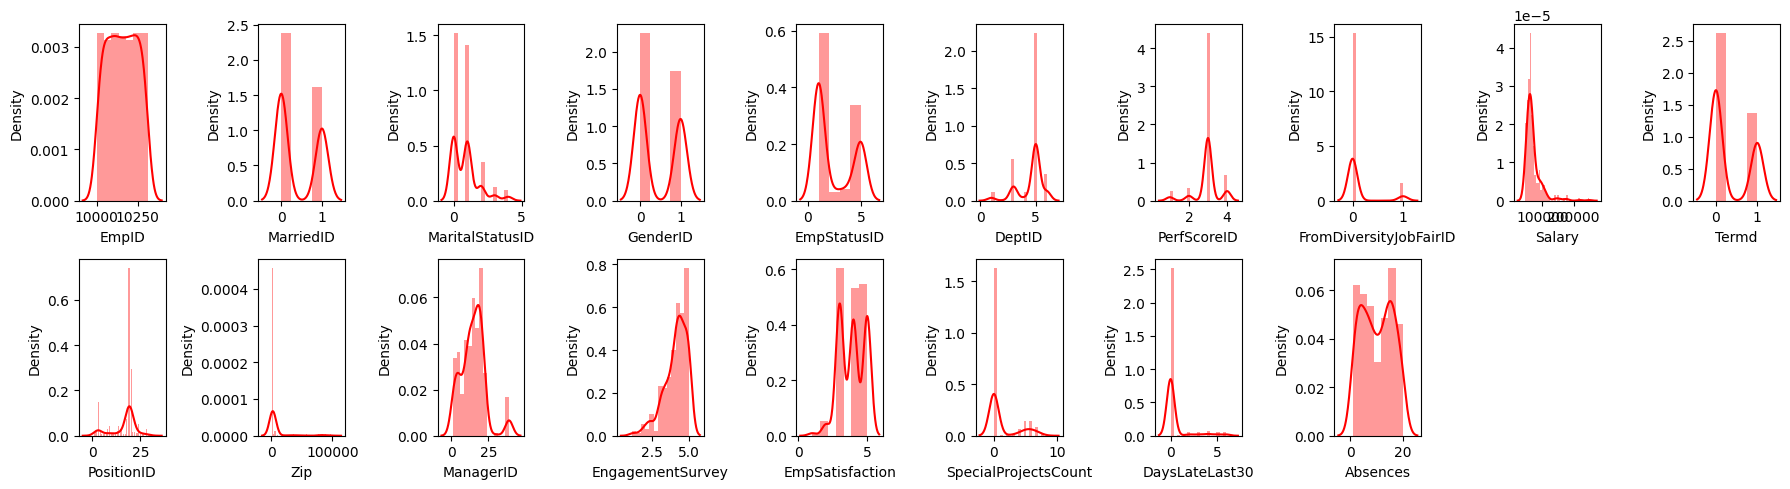

In [23]:
plt.figure(figsize=(18,5))
feature = nums
for i in range (0, len(feature)):
  plt.subplot(2,len(feature)//2+1, i +1 )
  sns.distplot(x=df_hr[feature[i]], color="red")
  plt.xlabel(feature[i])
  plt.tight_layout()